<a href="https://colab.research.google.com/github/amirnugroho/UAS_DeepLearning/blob/main/2_Data_Visualization_(NASA_FIRMS_MODIS)_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geodatasets

In [2]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 40.9 MB/s eta 0:00:00


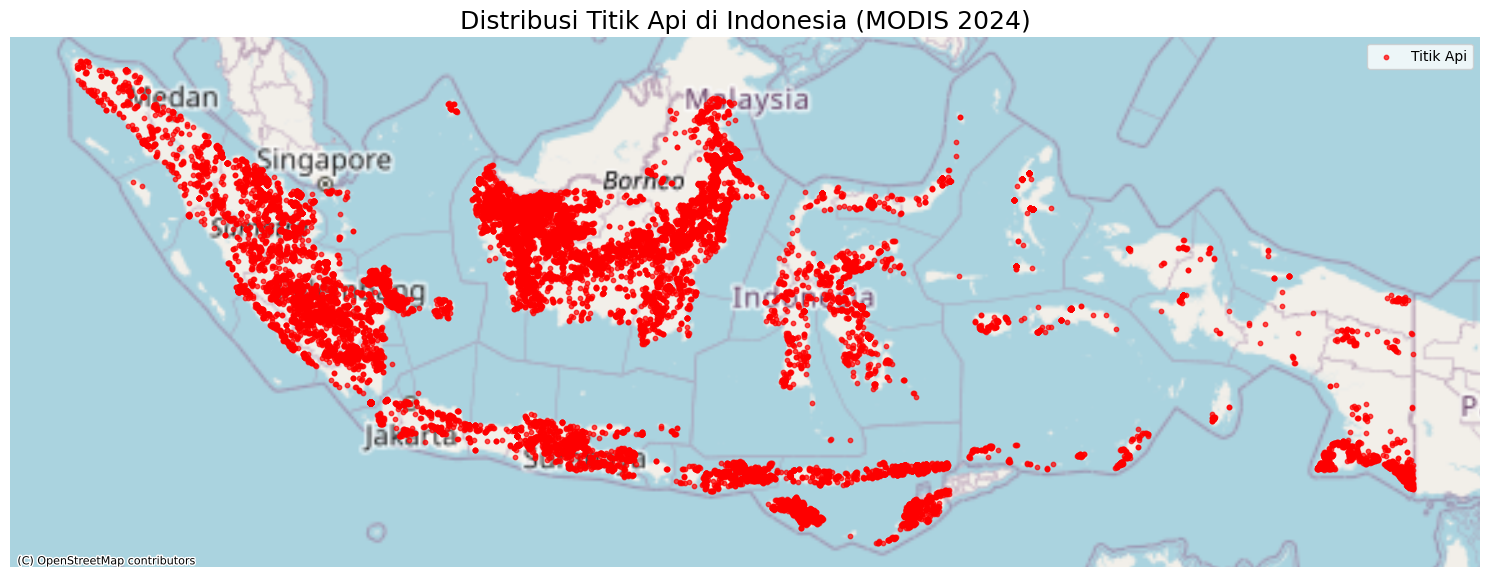

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import contextily as ctx
import seaborn as sns
import numpy as np

# Path ke file Anda
file_path = '/content/modis_2024_Indonesia.csv'
data = pd.read_csv(file_path)

# 1. Membuat GeoDataFrame dari data titik api
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326") # Menentukan CRS awal

# Membuat plot dasar
fig, ax = plt.subplots(figsize=(15, 12))

# Plot titik api
# Kita ubah proyeksi (CRS) agar cocok dengan basemap dari contextily
geo_df.to_crs(epsg=3857).plot(ax=ax, markersize=10, color='red', alpha=0.7, label='Titik Api')

# Menambahkan peta latar belakang dari internet menggunakan contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Judul dan label (label sumbu tidak diperlukan karena sudah ada peta)
plt.title('Distribusi Titik Api di Indonesia (MODIS 2024)', fontsize=18)
ax.set_axis_off() # Menghilangkan sumbu x dan y agar peta terlihat bersih
plt.legend()
plt.tight_layout()
plt.savefig("indonesia_fire_distribution_contextily.png")
plt.show()

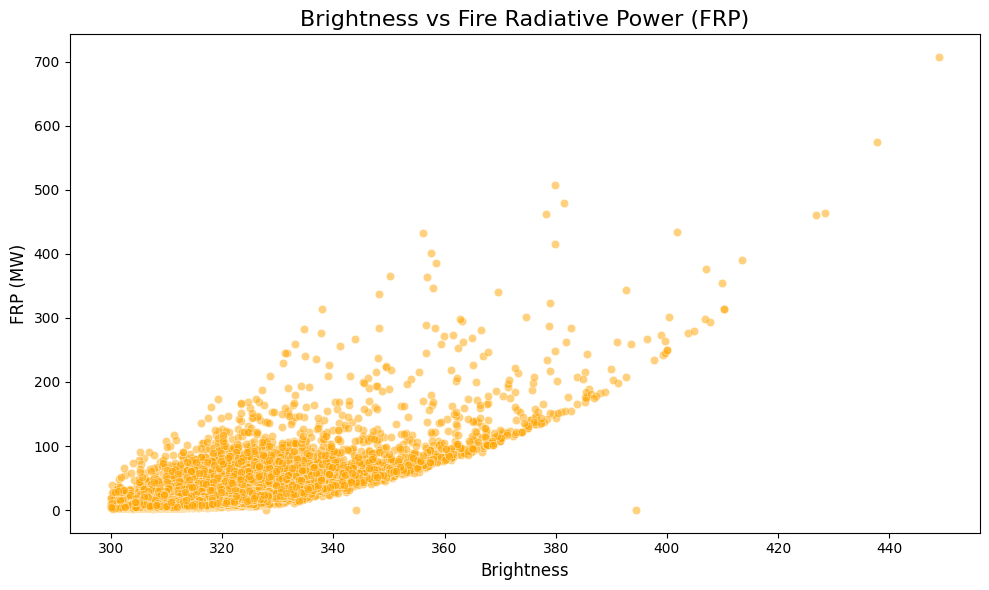

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='brightness', y='frp', data=data, alpha=0.5, color='orange')
plt.title('Brightness vs Fire Radiative Power (FRP)', fontsize=16)
plt.xlabel('Brightness', fontsize=12)
plt.ylabel('FRP (MW)', fontsize=12)
plt.tight_layout()
plt.show()


> **1. Fire Radiative Power (FRP) vs. Brightness**
> *This scatter plot shows the relationship between brightness and FRP, which are indicators of fire intensity.*

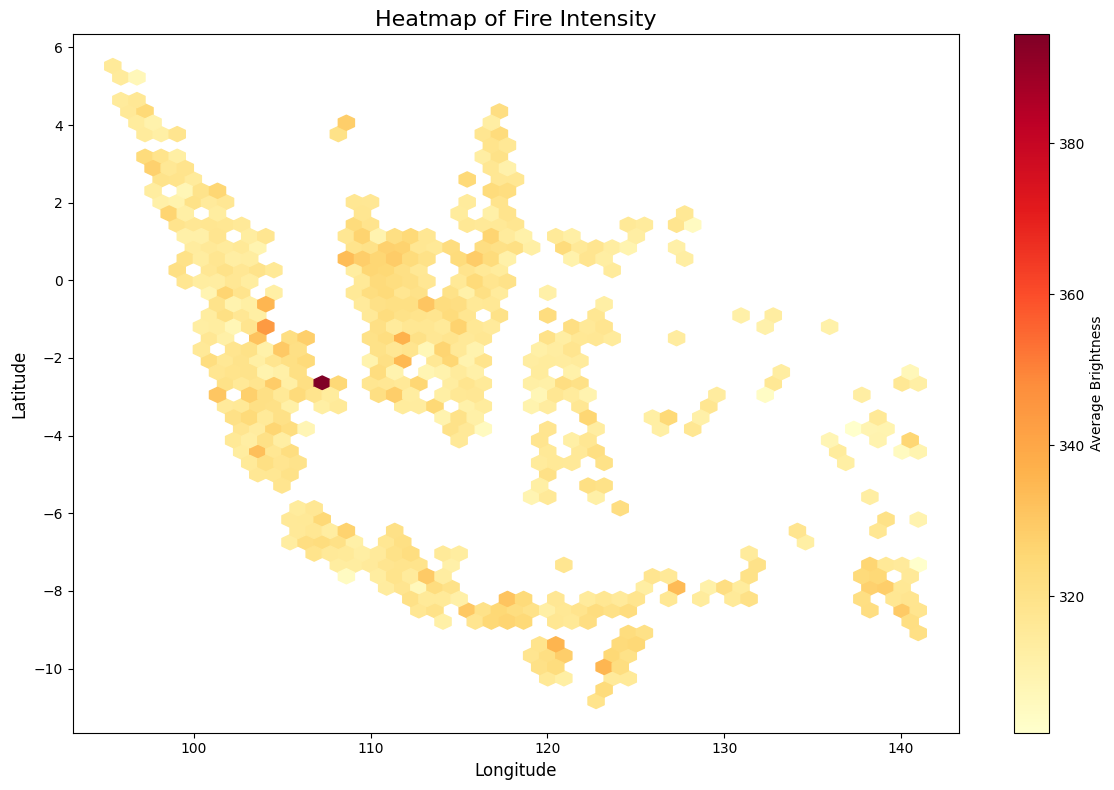

In [10]:
plt.figure(figsize=(12, 8))
heatmap_data = data.sample(5000)  # Sample data to avoid overcrowding
plt.hexbin(
    heatmap_data['longitude'],
    heatmap_data['latitude'],
    C=heatmap_data['brightness'],
    gridsize=50,
    cmap='YlOrRd',
    reduce_C_function=np.mean
)
plt.colorbar(label='Average Brightness')
plt.title('Heatmap of Fire Intensity', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()


> **2. Heatmap of Fire Intensity by Latitude and Longitude**

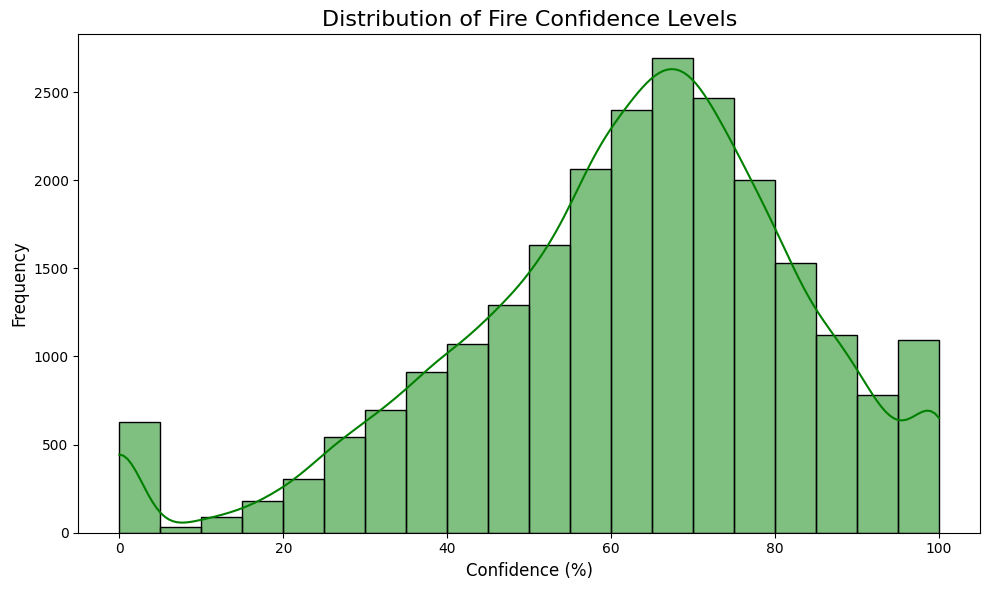

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data['confidence'], bins=20, kde=True, color='green')
plt.title('Distribution of Fire Confidence Levels', fontsize=16)
plt.xlabel('Confidence (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


> **3. Confidence Distribution**

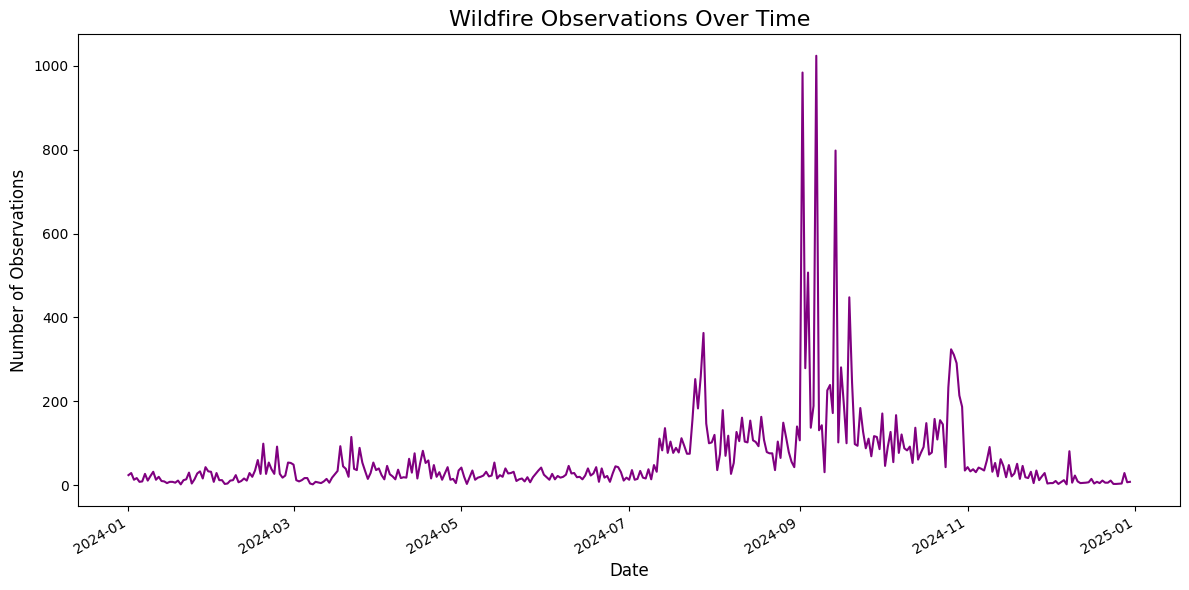

In [12]:
# Convert acquisition date to datetime if not already
data['acq_date'] = pd.to_datetime(data['acq_date'])

# Group data by date
fires_over_time = data.groupby('acq_date').size()

plt.figure(figsize=(12, 6))
fires_over_time.plot(color='purple')
plt.title('Wildfire Observations Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.tight_layout()
plt.show()


> **4. Temporal Analysis: Fires Over Time**

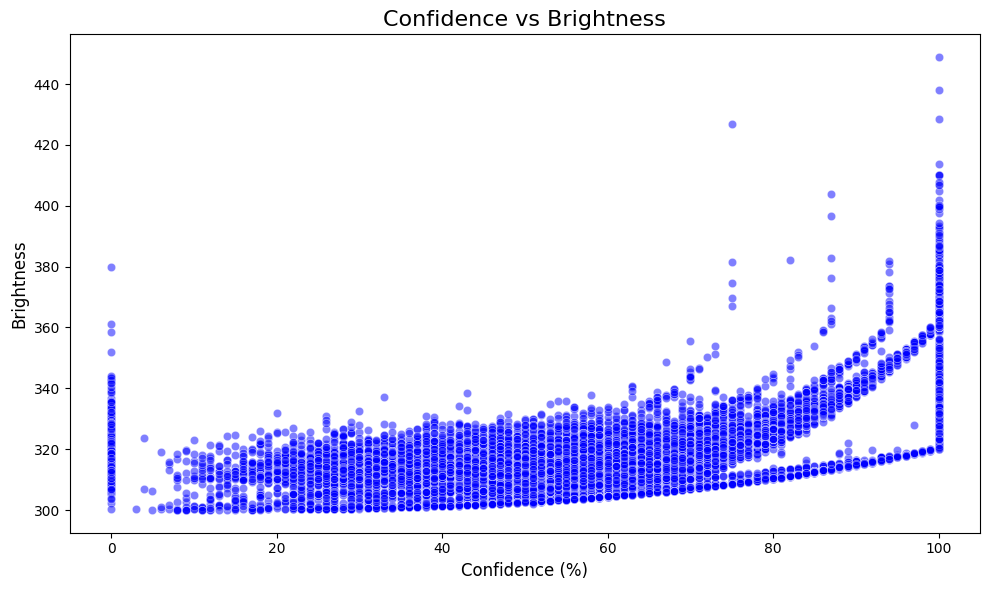

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='brightness', data=data, alpha=0.5, color='blue')
plt.title('Confidence vs Brightness', fontsize=16)
plt.xlabel('Confidence (%)', fontsize=12)
plt.ylabel('Brightness', fontsize=12)
plt.tight_layout()
plt.show()


> **5. Confidence vs Brightness**

> **Why These Visualizations?**

> **FRP vs Brightness:** *Highlights how fire radiative power correlates with brightness.*

> **Time of Day:** *Shows differences in fire intensity between day and night.*

> **Heatmap:** *Visualizes the density and intensity of fires geographically.*

> **Confidence Distribution:** *Examines the reliability of fire detections.*

> **Temporal Analysis:** *Tracks wildfire trends over time.*

> **Confidence vs Brightness:** *Explores whether confidence in detection correlates with fire intensity.*

Top 10 Wildfire Locations by Frequency:
       latitude  longitude  count
10316   -2.5783   121.3798      2
7467    -3.9036   122.4161      2
19832    0.6867   117.5623      2
11473   -2.2074   115.4947      2
7534    -3.8761   122.4044      2
3877    -8.1159   112.9233      2
4989    -7.5445   110.4425      2
7637    -3.8719   122.3998      2
7731    -3.8674   122.4037      2
21269    1.0366   120.8206      2


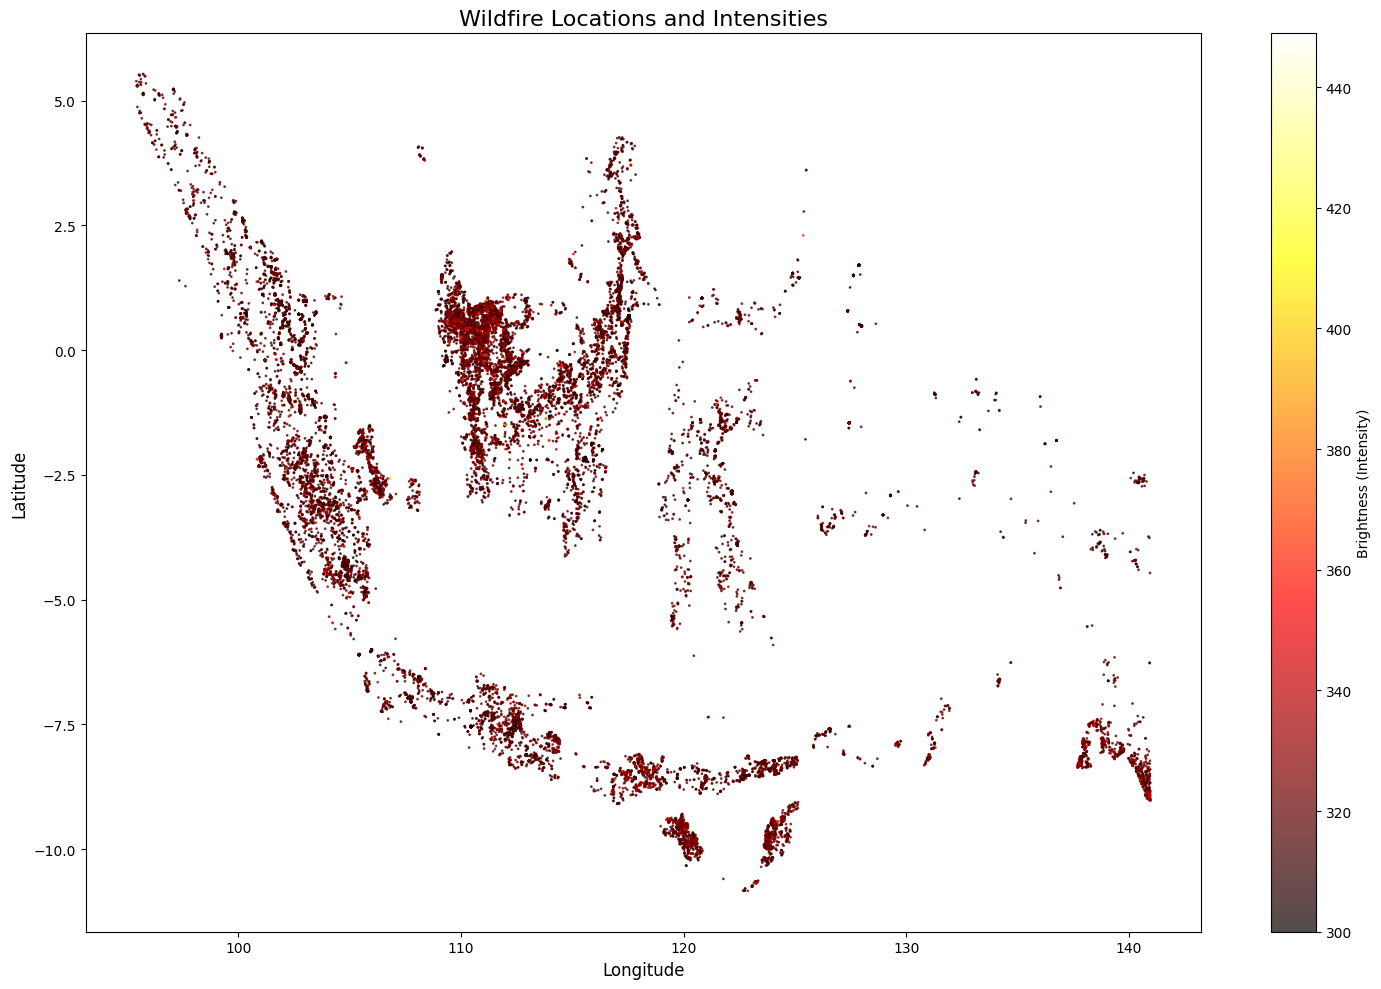

In [14]:
# Top regions with high wildfire occurrences
top_regions = data.groupby(['latitude', 'longitude']).size().reset_index(name='count')
top_regions = top_regions.sort_values(by='count', ascending=False).head(10)

print("Top 10 Wildfire Locations by Frequency:")
print(top_regions)

# Scatter plot of latitude vs longitude, with intensity (brightness) as color
plt.figure(figsize=(15, 10))
plt.scatter(data['longitude'], data['latitude'], c=data['brightness'], cmap='hot', s=1, alpha=0.7)
plt.colorbar(label='Brightness (Intensity)')
plt.title('Wildfire Locations and Intensities', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()


> **1. Wildfire Monitoring: Identify and Analyze Wildfire Locations and Intensities**
> *The scatter plot shows the locations of wildfires with the brightness indicating intensity.*
> *Identifying top regions with high wildfire occurrences can help monitor active wildfire areas.*

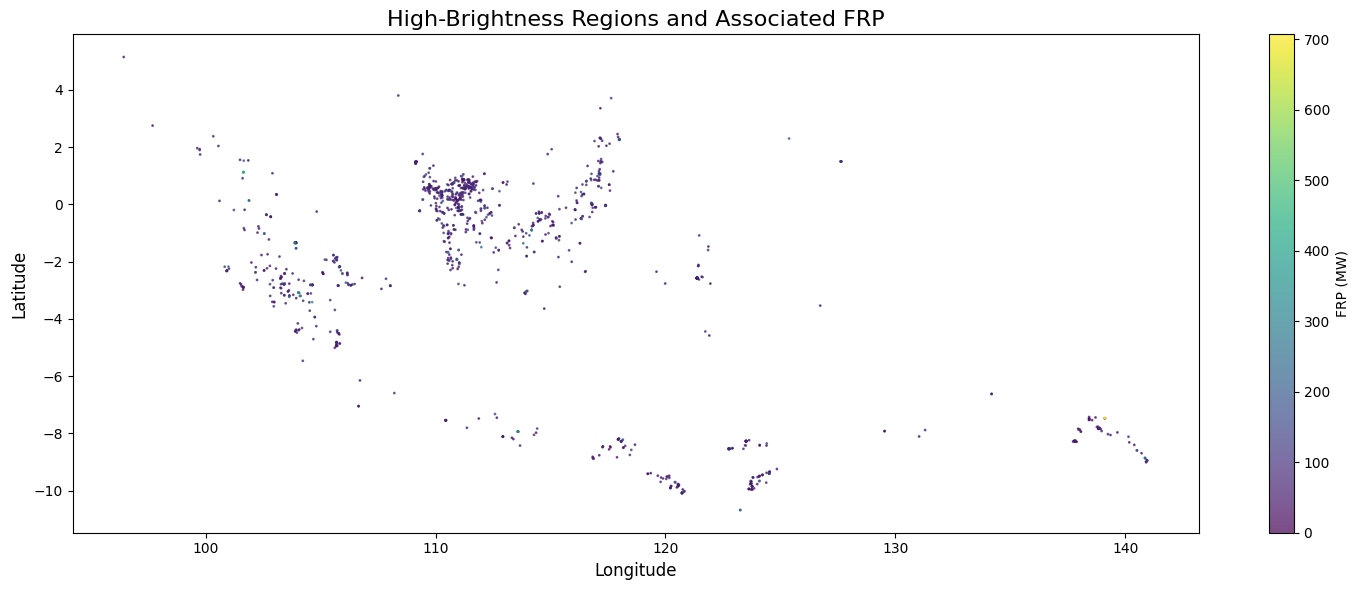

In [15]:
# Focus on FRP in high-brightness regions
high_brightness = data[data['brightness'] > data['brightness'].quantile(0.95)]
plt.figure(figsize=(15, 6))
plt.scatter(high_brightness['longitude'], high_brightness['latitude'], c=high_brightness['frp'], cmap='viridis', s=1, alpha=0.7)
plt.colorbar(label='FRP (MW)')
plt.title('High-Brightness Regions and Associated FRP', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()


> **2. Environmental Impact Studies: Effects on Air Quality, Carbon Emissions, and Ecosystems**
> *Fire Radiative Power (FRP) is analyzed to measure energy released, which is linked to carbon emissions.
High-brightness regions are mapped with their FRP values to indicate environmental impact hotspots.*

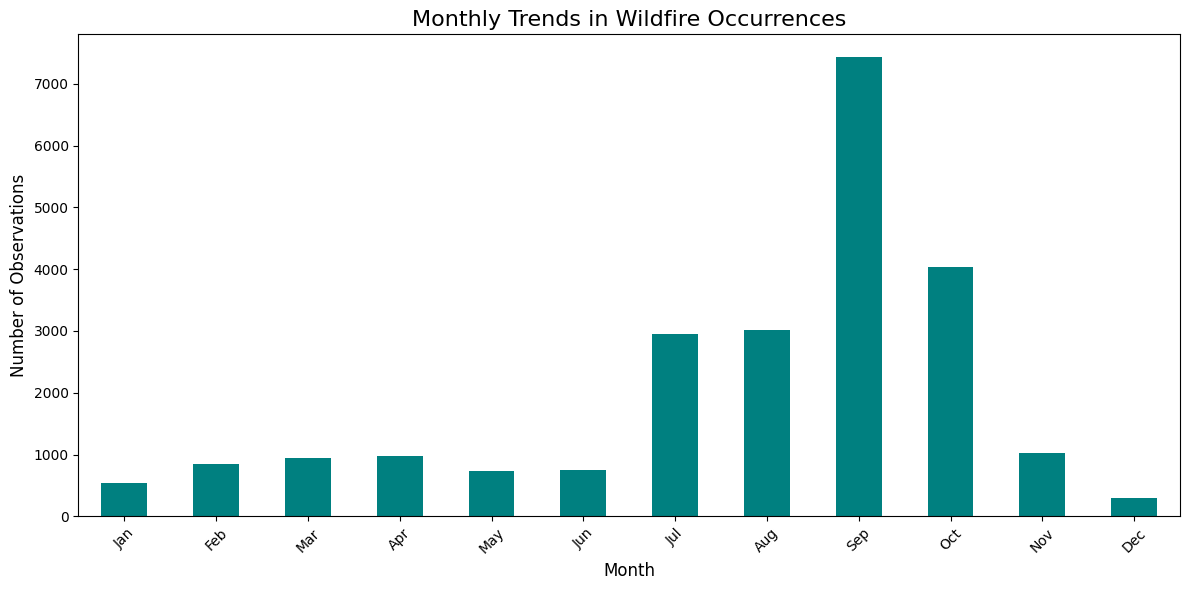

In [16]:
# Temporal Analysis: Monthly trends in wildfire occurrences
data['month'] = data['acq_date'].dt.month
monthly_trends = data.groupby('month').size()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', color='teal')
plt.title('Monthly Trends in Wildfire Occurrences', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()


> **3. Climate Change Research: Relationships Between Wildfires and Climate Patterns**
> *Monthly trends in wildfire occurrences provide insight into seasonal patterns and their relationship with changing climates.
Brightness vs. confidence correlation is explored to understand the reliability of observations.*